# クラスタリング(Clustering)

クラスタリングは大きく2つの手法に分類される

- フラットクラスタリング(flat clustering)
- 階層的クラスタリング(hierarchical clustering)

## フラットクラスタリング(非階層的クラスタリング)

クラスタ間の関係を考慮せずにデータを分割。
全てのデータがどこか1つのクラスタに属するように分割する。
類似性の高いデータ同士がグループ化され、他のクラスタのデータとは類似していないことが求められる。

フラットクラスタリングを行うアルゴリズムは数多く存在し、その多くは前もってクラスタの数を決める必要がある。

## 階層的クラスタリング

その代わり名前の通り階層構造を持つ。
類似性の高いデータをクラスタとしてグループ化し、さらにそのクラスタと類似するクラスタをまとめて親クラスタとする。
これを再帰的に行って、クラスタが1つになるまで繰り返される(最後のクラスタは全てのデータを持つ)。

階層的クラスタリングでは、クラスタの数を指定する必要はない。クラスタの数を指定できるものの、処理効率を落とすことになる。

---

# KMeans

フラットクラスタリングの中でも最も広く用いられるアルゴリズム。クラスタの数を指定し、その指定した数だけ中心点(centroid)を持つ。

### 特徴


## KMeansのアルゴリズム

1. 指定したクラスタ数のデータを任意に選び、それを中心点とする
2. 選ばなかったデータについて、最も近い中心点を持つクラスタを、そのデータのクラスタとみなす
3. 各クラスタの中心点の位置データを更新。クラスタに所属するデータ全てを対象にして、それらの特徴ベクトルの平均をクラスタの中心点とする
4. 変更した中心点に合わせて、クラスタの割当てをもう一度行う
5. この作業を中心点の動く距離がある閾値以上の間、繰り返し行う
6. 閾値を下回ればクラスタリングが収束したと考える

アルゴリズムは [こちら](http://tech.nitoyon.com/ja/blog/2009/04/09/kmeans-visualise/) が視覚的にも分かりやすい。

In [27]:
%matplotlib inline

import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans

import plotting
import datasets as datasets_utils

## IrisのデータをPlotting

In [12]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df[:4]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


['setosa' 'versicolor' 'virginica']


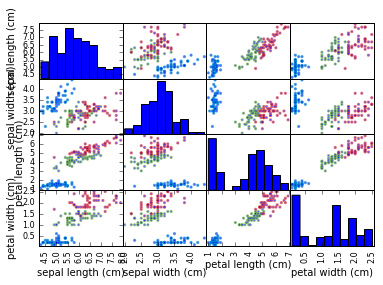

In [18]:
print(iris.target_names)
color_mapping = ("#0392cf", "#7bc043", "#ee4035")

colored_target = pd.Series(iris.target).apply(lambda x: color_mapping[x])
ax = scatter_matrix(df, color=colored_target, alpha=0.6, diagonal='hist')
plt.show()

## KMeans

In [21]:
estimator = KMeans(n_clusters=3)
estimator.fit(df)
estimator.labels_  # ラベリングした結果

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

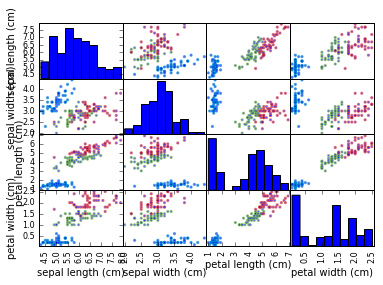

In [25]:
ans = pd.Series(estimator.labels_)
colors = ans.map(lambda x: color_mapping[x])
ax = scatter_matrix(df, color=colored_target, alpha=0.6, diagonal='hist')
plt.show()

見た目上は一致しているように見える。

In [30]:
metrics.accuracy_score(iris.target, estimator.labels_)

0.89333333333333331

KMeansは教師なし学習であるため、必ずしもそれが自分たちの分離したいものを分離した結果であるという保証はない。

## 参考資料

- 実践機械学習システム O'reily
- http://jaistlt.connpass.com/event/17739/